In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
csv_path = "../Desktop/Pothole_Data_No_Duplicates.csv"
data_df = pd.read_csv(csv_path)

data_df.head()

,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,ZIP,X COORDINATE,Y COORDINATE,Ward,Police District,Community Area,SSA,LATITUDE,LONGITUDE,LOCATION
0,1/1/11,Completed,1/3/11,11-00002021,Pot Hole in Street,Dispatch Crew,Pothole Patched,5.0,1642 W 99TH ST,60643.0,1166945.425,1839061.363,19.0,22.0,72.0,NaN,41.714035,-87.665096,"(41.71403466751051, -87.66509581640723)"
1,1/1/11,Completed,1/3/11,11-00002273,Pot Hole in Street,Dispatch Crew,Pothole Patched,7.0,3500 S PULASKI RD,60623.0,1150257.889,1881339.806,22.0,10.0,30.0,NaN,41.830224,-87.724352,"(41.830223541014355, -87.7243519544564)"
2,1/1/11,Completed,1/3/11,11-00002650,Pot Hole in Street,Dispatch Crew,Pothole Patched,5.0,7851 S DR MARTIN LUTHER KING JR DR,60619.0,1180265.093,1853037.884,6.0,6.0,69.0,51.0,41.751434,-87.614820,"(41.75143385051753, -87.61481960290558)"
3,1/1/11,Completed,1/3/11,11-00002654,Pot Hole in Street,Dispatch Crew,Pothole Patched,3.0,15 E 79TH ST,60619.0,1177809.183,1852641.290,6.0,6.0,44.0,NaN,41.750865,-87.623890,"(41.75086472111055, -87.62388985583482)"
4,1/1/11,Completed,1/3/11,11-00002656,Pot Hole in Street,Dispatch Crew,Pothole Patched,4.0,359 E 79TH ST,60619.0,1179970.577,1852706.718,6.0,6.0,44.0,51.0,41.750992,-87.615824,"(41.75099208108744, -87.61582439398472)"


In [67]:
del data_df["SERVICE REQUEST NUMBER"]
del data_df["X COORDINATE"]
del data_df["Y COORDINATE"]
del data_df["SSA"]
del data_df["NUMBER OF POTHOLES FILLED ON BLOCK"]
del data_df["Police District"]


data_df.head()

,CREATION DATE,STATUS,COMPLETION DATE,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,STREET ADDRESS,ZIP,Ward,Community Area,LATITUDE,LONGITUDE,LOCATION
0,1/1/11,Completed,1/3/11,Pot Hole in Street,Dispatch Crew,Pothole Patched,1642 W 99TH ST,60643.0,19.0,72.0,41.714035,-87.665096,"(41.71403466751051, -87.66509581640723)"
1,1/1/11,Completed,1/3/11,Pot Hole in Street,Dispatch Crew,Pothole Patched,3500 S PULASKI RD,60623.0,22.0,30.0,41.830224,-87.724352,"(41.830223541014355, -87.7243519544564)"
2,1/1/11,Completed,1/3/11,Pot Hole in Street,Dispatch Crew,Pothole Patched,7851 S DR MARTIN LUTHER KING JR DR,60619.0,6.0,69.0,41.751434,-87.614820,"(41.75143385051753, -87.61481960290558)"
3,1/1/11,Completed,1/3/11,Pot Hole in Street,Dispatch Crew,Pothole Patched,15 E 79TH ST,60619.0,6.0,44.0,41.750865,-87.623890,"(41.75086472111055, -87.62388985583482)"
4,1/1/11,Completed,1/3/11,Pot Hole in Street,Dispatch Crew,Pothole Patched,359 E 79TH ST,60619.0,6.0,44.0,41.750992,-87.615824,"(41.75099208108744, -87.61582439398472)"


In [68]:
completed_only = data_df[data_df["STATUS"] == "Completed"]
completed_only = completed_only[completed_only["Ward"] > 0]
completed_only.head()

,CREATION DATE,STATUS,COMPLETION DATE,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,STREET ADDRESS,ZIP,Ward,Community Area,LATITUDE,LONGITUDE,LOCATION
0,1/1/11,Completed,1/3/11,Pot Hole in Street,Dispatch Crew,Pothole Patched,1642 W 99TH ST,60643.0,19.0,72.0,41.714035,-87.665096,"(41.71403466751051, -87.66509581640723)"
1,1/1/11,Completed,1/3/11,Pot Hole in Street,Dispatch Crew,Pothole Patched,3500 S PULASKI RD,60623.0,22.0,30.0,41.830224,-87.724352,"(41.830223541014355, -87.7243519544564)"
2,1/1/11,Completed,1/3/11,Pot Hole in Street,Dispatch Crew,Pothole Patched,7851 S DR MARTIN LUTHER KING JR DR,60619.0,6.0,69.0,41.751434,-87.614820,"(41.75143385051753, -87.61481960290558)"
3,1/1/11,Completed,1/3/11,Pot Hole in Street,Dispatch Crew,Pothole Patched,15 E 79TH ST,60619.0,6.0,44.0,41.750865,-87.623890,"(41.75086472111055, -87.62388985583482)"
4,1/1/11,Completed,1/3/11,Pot Hole in Street,Dispatch Crew,Pothole Patched,359 E 79TH ST,60619.0,6.0,44.0,41.750992,-87.615824,"(41.75099208108744, -87.61582439398472)"


In [69]:
completed_only.dtypes

CREATION DATE               object
STATUS                      object
COMPLETION DATE             object
TYPE OF SERVICE REQUEST     object
CURRENT ACTIVITY            object
MOST RECENT ACTION          object
STREET ADDRESS              object
ZIP                        float64
Ward                       float64
Community Area             float64
LATITUDE                   float64
LONGITUDE                  float64
LOCATION                    object
dtype: object

In [71]:
completed_only["CREATION DATE"] = pd.to_datetime(completed_only["CREATION DATE"])
completed_only["COMPLETION DATE"] = pd.to_datetime(completed_only["COMPLETION DATE"])

completed_only.dtypes

CREATION DATE              datetime64[ns]
STATUS                             object
COMPLETION DATE            datetime64[ns]
TYPE OF SERVICE REQUEST            object
CURRENT ACTIVITY                   object
MOST RECENT ACTION                 object
STREET ADDRESS                     object
ZIP                               float64
Ward                              float64
Community Area                    float64
LATITUDE                          float64
LONGITUDE                         float64
LOCATION                           object
dtype: object

In [72]:
completed_only = completed_only[completed_only["CREATION DATE"] >= "2011-01-01"]
completed_only.head()

,CREATION DATE,STATUS,COMPLETION DATE,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,STREET ADDRESS,ZIP,Ward,Community Area,LATITUDE,LONGITUDE,LOCATION
0,2011-01-01,Completed,2011-01-03,Pot Hole in Street,Dispatch Crew,Pothole Patched,1642 W 99TH ST,60643.0,19.0,72.0,41.714035,-87.665096,"(41.71403466751051, -87.66509581640723)"
1,2011-01-01,Completed,2011-01-03,Pot Hole in Street,Dispatch Crew,Pothole Patched,3500 S PULASKI RD,60623.0,22.0,30.0,41.830224,-87.724352,"(41.830223541014355, -87.7243519544564)"
2,2011-01-01,Completed,2011-01-03,Pot Hole in Street,Dispatch Crew,Pothole Patched,7851 S DR MARTIN LUTHER KING JR DR,60619.0,6.0,69.0,41.751434,-87.614820,"(41.75143385051753, -87.61481960290558)"
3,2011-01-01,Completed,2011-01-03,Pot Hole in Street,Dispatch Crew,Pothole Patched,15 E 79TH ST,60619.0,6.0,44.0,41.750865,-87.623890,"(41.75086472111055, -87.62388985583482)"
4,2011-01-01,Completed,2011-01-03,Pot Hole in Street,Dispatch Crew,Pothole Patched,359 E 79TH ST,60619.0,6.0,44.0,41.750992,-87.615824,"(41.75099208108744, -87.61582439398472)"


In [73]:



completed_only["Days to Complete"] = (completed_only["COMPLETION DATE"] - completed_only["CREATION DATE"]).dt.days

completed_only.head()

,CREATION DATE,STATUS,COMPLETION DATE,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,STREET ADDRESS,ZIP,Ward,Community Area,LATITUDE,LONGITUDE,LOCATION,Days to Complete
0,2011-01-01,Completed,2011-01-03,Pot Hole in Street,Dispatch Crew,Pothole Patched,1642 W 99TH ST,60643.0,19.0,72.0,41.714035,-87.665096,"(41.71403466751051, -87.66509581640723)",2
1,2011-01-01,Completed,2011-01-03,Pot Hole in Street,Dispatch Crew,Pothole Patched,3500 S PULASKI RD,60623.0,22.0,30.0,41.830224,-87.724352,"(41.830223541014355, -87.7243519544564)",2
2,2011-01-01,Completed,2011-01-03,Pot Hole in Street,Dispatch Crew,Pothole Patched,7851 S DR MARTIN LUTHER KING JR DR,60619.0,6.0,69.0,41.751434,-87.614820,"(41.75143385051753, -87.61481960290558)",2
3,2011-01-01,Completed,2011-01-03,Pot Hole in Street,Dispatch Crew,Pothole Patched,15 E 79TH ST,60619.0,6.0,44.0,41.750865,-87.623890,"(41.75086472111055, -87.62388985583482)",2
4,2011-01-01,Completed,2011-01-03,Pot Hole in Street,Dispatch Crew,Pothole Patched,359 E 79TH ST,60619.0,6.0,44.0,41.750992,-87.615824,"(41.75099208108744, -87.61582439398472)",2


In [74]:
ward_group = completed_only.groupby("Ward")
count_ward = ward_group["Ward"].count()
count_ward






Ward
1.0      6803
2.0      9781
3.0      6478
4.0      5388
5.0      7661
6.0      8235
7.0      6116
8.0     10879
9.0      8130
10.0     9326
11.0     8453
12.0     7373
13.0    11558
14.0     8851
15.0     5971
16.0     6389
17.0     6929
18.0     9822
19.0    12524
20.0     5909
21.0     9964
22.0     4628
23.0    11873
24.0     6324
25.0     7741
26.0     6125
27.0     9214
28.0     7213
29.0     7586
30.0     5496
31.0     6491
32.0    10203
33.0     5161
34.0    10030
35.0     6173
36.0     8931
37.0     5936
38.0     9160
39.0     9046
40.0     7022
41.0    13748
42.0    11995
43.0     5908
44.0     4550
45.0    10696
46.0     2980
47.0     6193
48.0     4013
49.0     5595
50.0     8014
Name: Ward, dtype: int64

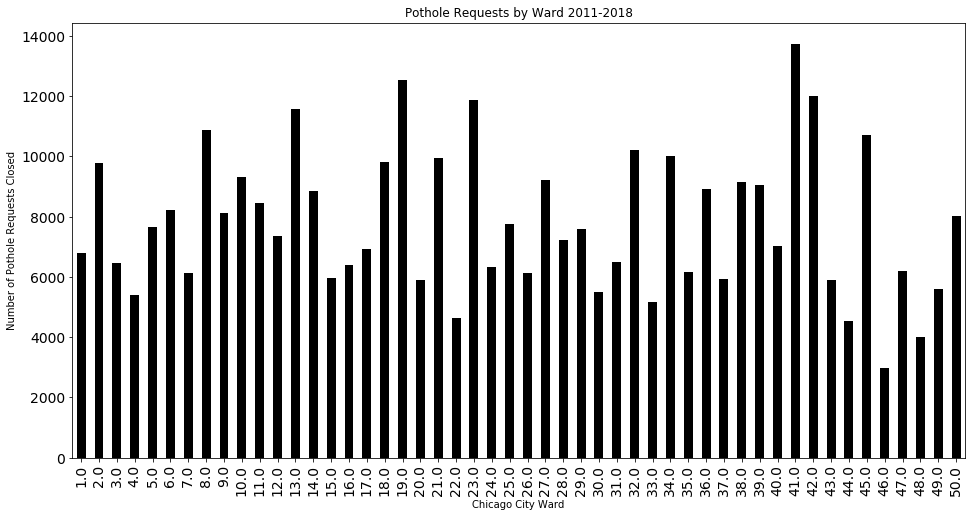

<Figure size 432x288 with 0 Axes>

In [75]:
count_chart = count_ward.plot(kind="bar", facecolor="black", figsize = (16,8), fontsize=14)
count_chart.set_xlabel("Chicago City Ward")
count_chart.set_ylabel("Number of Pothole Requests Closed")
count_chart.set_title("Pothole Requests by Ward 2011-2018")


plt.show()
plt.tight_layout()

In [76]:
completed_only["Days to Complete"].describe()

count    390585.000000
mean         19.899535
std          33.272290
min           0.000000
25%           1.000000
50%           6.000000
75%          22.000000
max        1194.000000
Name: Days to Complete, dtype: float64

In [77]:
zero_days = completed_only[completed_only["Days to Complete"] == 0]
zero_percent_total = round(zero_days["Days to Complete"].count() / completed_only["Days to Complete"].count() * 100, 1)
total_completed_requests = completed_only["Days to Complete"].count()
beg_date = completed_only["CREATION DATE"].min()
end_date = completed_only["CREATION DATE"].max()

In [78]:
print(f'Between {beg_date} and {end_date}:')
print(f'Total number of completed pot hole requests: {total_completed_requests}.')
print(f'Number of pot hole requests completed on the same day: {zero_days["Days to Complete"].count()}')
print(f'Percent of pot hole requests completed on the same day: {zero_percent_total}%')

Between 2011-01-01 00:00:00 and 2018-12-17 00:00:00:
Total number of completed pot hole requests: 390585.
Number of pot hole requests completed on the same day: 92122
Percent of pot hole requests completed on the same day: 23.6%


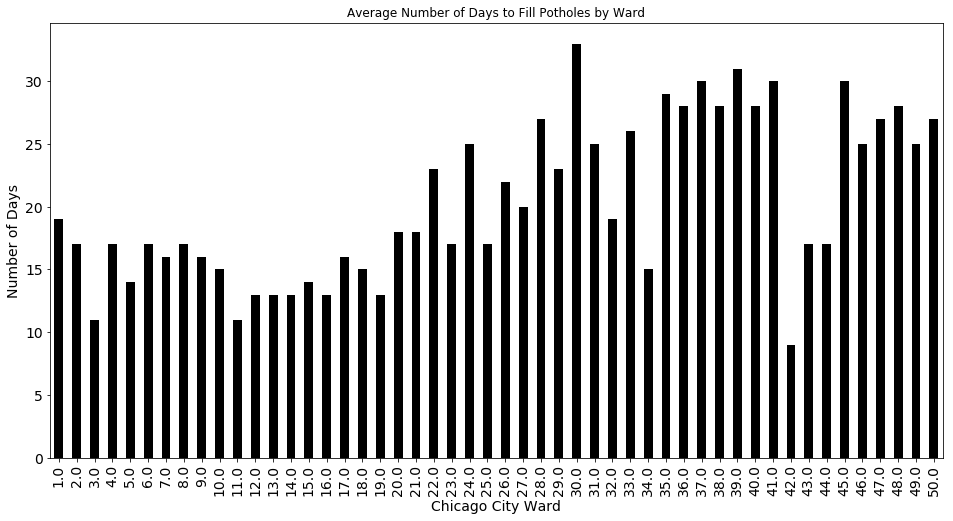

<Figure size 432x288 with 0 Axes>

In [79]:
avg_days_city = round(ward_group["Days to Complete"].mean())
avg_days_ward = round(ward_group["Days to Complete"].mean())
avg_days_chart = avg_days_ward.plot(kind="bar", facecolor="black", figsize = (16,8), fontsize =14)

avg_days_chart.set_title("Average Number of Days to Fill Potholes by Ward")
avg_days_chart.set_xlabel("Chicago City Ward", fontsize=14)
avg_days_chart.set_ylabel("Number of Days", fontsize=14)



plt.show()
plt.tight_layout()

In [85]:
ward_summary = pd.DataFrame({"Number of Service Requests": count_ward, 
                             "Average Days to Complete": avg_days_ward})

ward_summary.head()                            

,Number of Service Requests,Average Days to Complete
Ward,,
1.0,6803,19.0
2.0,9781,17.0
3.0,6478,11.0
4.0,5388,17.0
5.0,7661,14.0


In [86]:
csv_path = "../Desktop/ward_data.csv"
ward_data = pd.read_csv(csv_path)

ward_data.head()

,Ward,Alderman,Population Estimate,Mean Household Income,White,Black,Asian,Hispanic or Latino
0,1,Moreno,55705,108482,0.547,0.050,0.040,0.337
1,2,Hopkins,55855,130287,0.731,0.076,0.070,0.099
2,3,Dowell,51207,33968,0.212,0.616,0.104,0.045
3,4,King,53079,93453,0.221,0.610,0.096,0.044
4,5,Hairston,45853,65738,0.225,0.640,0.067,0.040


In [87]:
ward_merge = pd.merge(ward_summary, ward_data_df, on="Ward")
ward_merge_sorted = ward_merge.sort_values("Average Days to Complete", ascending=False)
ward_merge_sorted.reset_index(drop=True)

,Ward,Number of Service Requests,Average Days to Complete,Alderman,Population Estimate,Mean Household Income,White,Black,Asian,Hispanic or Latino
0,30.0,5496,33.0,Reboyras,55633,66067,0.273,0.017,0.033,0.664
1,39.0,9046,31.0,Laurino,58160,93153,0.525,0.024,0.177,0.241
2,37.0,5936,30.0,Mitts,51916,45522,0.018,0.690,0.004,0.272
3,45.0,10696,30.0,Arena,58053,88762,0.618,0.013,0.080,0.263
4,41.0,13748,30.0,Napolitano,58195,68887,0.892,0.010,0.042,0.121
5,35.0,6173,29.0,Ramirez-Rosa,52009,56070,0.245,0.040,0.062,0.636
6,38.0,9160,28.0,Sposato,58872,78922,0.641,0.017,0.048,0.278
7,48.0,4013,28.0,Osterman,49517,73574,0.538,0.149,0.125,0.156
8,40.0,7022,28.0,O'Connor,57582,82464,0.508,0.065,0.163,0.222
9,36.0,8931,28.0,Villegas,51771,66687,0.225,0.030,0.036,0.700


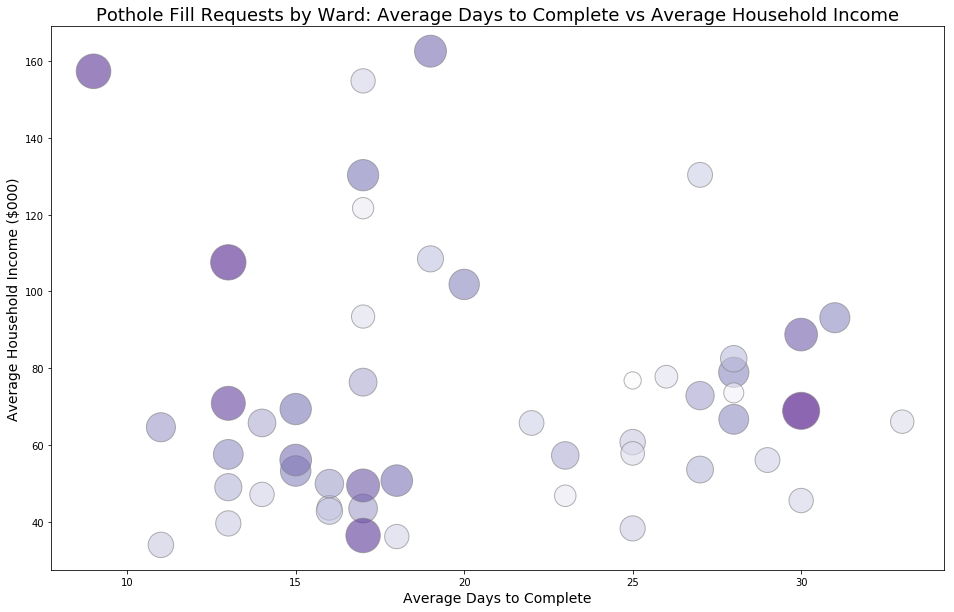

<Figure size 432x288 with 0 Axes>

In [105]:
x_axis = ward_merge["Average Days to Complete"]
y_axis = ward_merge["Mean Household Income"] / 1000
size = ward_merge["Number of Service Requests"] / 10
color = ward_merge["Number of Service Requests"]

plt.scatter(x_axis, y_axis, s=size, marker="o", c=color, cmap="Purples", edgecolors="grey", alpha=0.6)

plt.title("Pothole Fill Requests by Ward: Average Days to Complete vs Average Household Income", fontsize=18)
plt.xlabel("Average Days to Complete", fontsize=14)
plt.ylabel("Average Household Income ($000)", fontsize=14)

#plt.text(250, 33, "*Size/color indicates number of requests per ward.", fontsize=14)
#plt.xlim([7, 35])
#plt.ylim([30, 170])
plt.gcf().set_size_inches((16, 10))
#plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()
plt.tight_layout()